# Generating Fashion Items Using A Generative Adversarial Network

## Creating the Generative Adversarial Network

### Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tqdm import tqdm

### Define The Discriminator

In [2]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = (28, 28)))
discriminator.add(Dense(150, activation = 'selu'))
discriminator.add(Dense(100, activation = 'selu'))
discriminator.add(Dense(1, activation = 'sigmoid'))

### Define The Generator

In [3]:
generator = Sequential()
generator.add(Dense(100, activation = 'selu', input_shape = [300]))
generator.add(Dense(150, activation = 'selu'))
generator.add(Dense(784, activation = 'sigmoid'))
generator.add(Reshape((28, 28)))

### Define The Generative Adversarial Network Using The Discriminator and The Generator

In [4]:
gan = Sequential([generator, discriminator])

### Compile Model That Trains The Discriminator

In [5]:
discriminator.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

### Compile Model That Trains The Generator

In [6]:
discriminator.trainable = False
gan.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

## Fashion MNIST Dataset

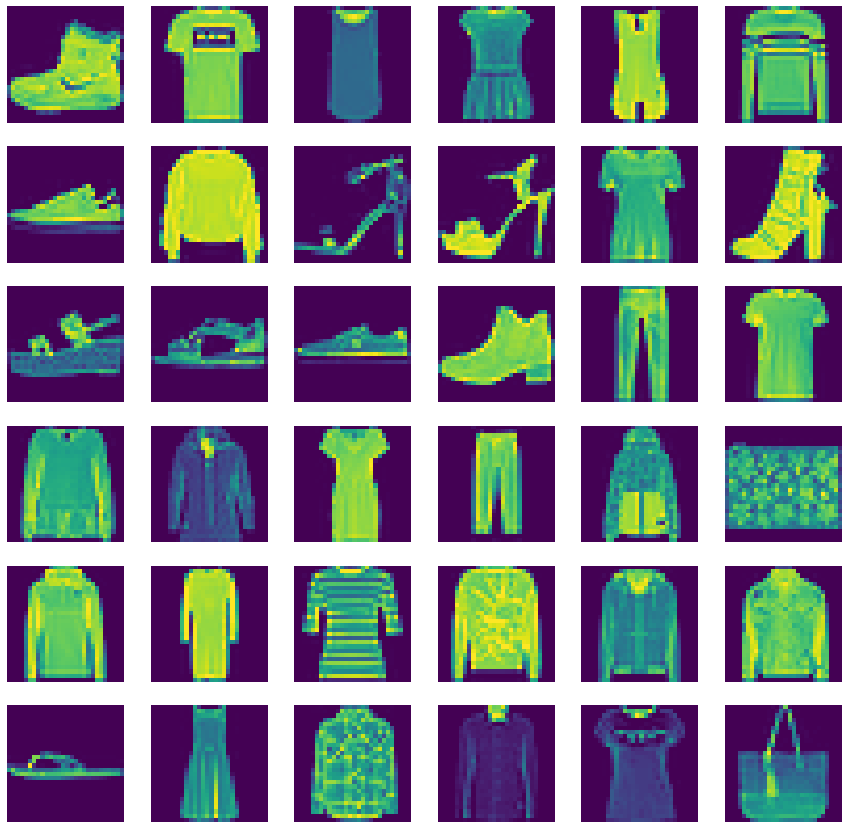

In [7]:
fashion_mnist_dataset = tf.keras.datasets.fashion_mnist

(X_train, _), (X_test, _) = fashion_mnist_dataset.load_data()
X_train, X_test = X_train / 255, X_test / 255

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

for row in range(0, 6):
    for col in range(0, 6):
        current_image = X_train[6 * row + col]
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image)

real_images = np.vstack([X_train, X_test])
plt.show()

## Training The Generative Adversarial network

In [8]:
epochs     = 50000
batch_size = 50

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for _ in tqdm(range(epochs)):
    generator, discriminator = gan.layers
    #Train The Discriminator
    discriminator.trainable = True
    
    ## Randomly select real images
    index = np.random.randint(0, real_images.shape[0], batch_size)
    true_images = real_images[index]
    
    ## Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 300))
    fake_images = generator.predict(noise)
    
    # Train on real images, then on fake images
    discriminator.train_on_batch(true_images, real)
    discriminator.train_on_batch(fake_images, fake)
    
    #Train The Generator
    discriminator.trainable = False
    noise = np.random.normal(0, 1, (batch_size, 300))
    gan.train_on_batch(noise, real)
    

100%|██████████| 50000/50000 [45:50<00:00, 18.18it/s]  


## Final Results

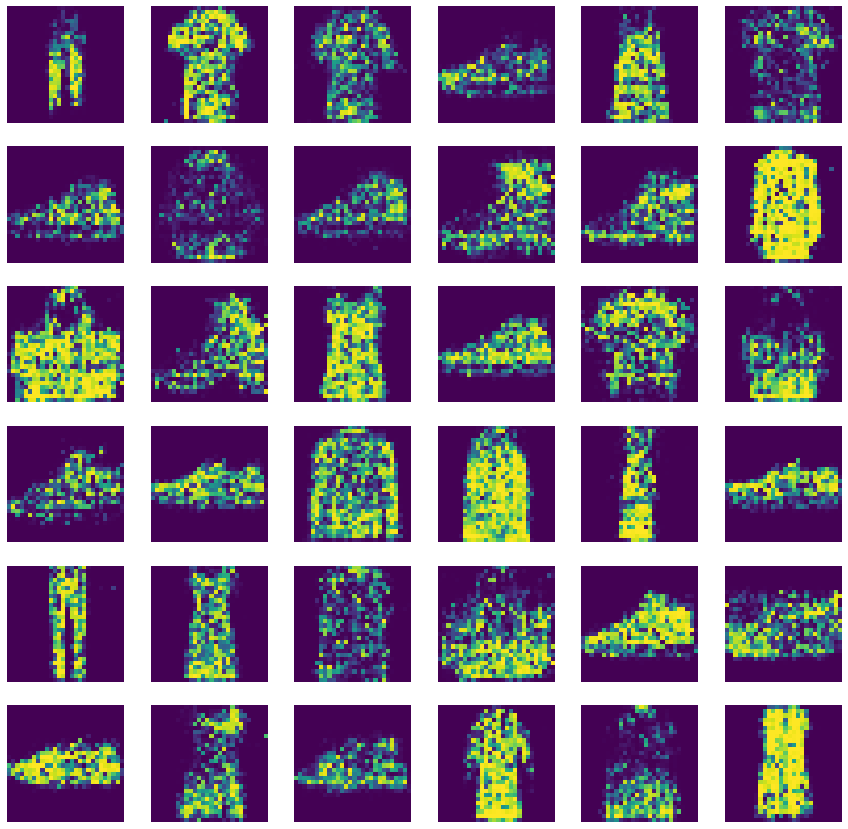

In [9]:
generated_images = generator.predict(np.random.normal(0, 1, (36, 300)))

fig, axes = plt.subplots(6, 6, figsize = (15, 15))

for row in range(0, 6):
    for col in range(0, 6):
        current_image = generated_images[6 * row + col]
        axes[row, col].axis('off')
        axes[row, col].imshow(current_image)

plt.show()